In [80]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns
import mysql.connector
from mysql.connector import Error

In [81]:
def cargar_tablas_a_dataframes(host, database, user, password):
    """
    Se conecta a una base de datos MySQL y carga todas las tablas como DataFrames de Pandas
    con nombres dinámicos en el entorno global (ej. df_nombreTabla).
    """
    try:
        connection = mysql.connector.connect(
            host=host,
            database=database,
            user=user,
            password=password
        )

        if connection.is_connected():
            cursor = connection.cursor()  # Creación de un cursor para ejecutar consultas SQL
            cursor.execute("SHOW TABLES")  # Se ejecuta la consulta "SHOW TABLES" para listar las tablas

            tablas = [tabla[0] for tabla in cursor.fetchall()]  # Se obtienen los nombres de las tablas

            for tabla in tablas:
                cursor.execute(f"SELECT * FROM {tabla}")  # Se extraen los datos de cada tabla
                columnas = [columna[0] for columna in cursor.description]  # Nombres de columnas
                globals()[f'df_{tabla}'] = pd.DataFrame(cursor.fetchall(), columns=columnas)  # DataFrame dinámico
                print(f'df_{tabla}')  # Mostrar el nombre del DataFrame creado

    except Error as e:
        print("Error while connecting to MySQL:", e)  # Manejo de errores

    finally:
        if 'connection' in locals() and connection.is_connected():
            cursor.close()  # Cierra el cursor
            connection.close()  # Cierra la conexión
            print("MySQL connection is closed")  # Mensaje de cierre

In [82]:
cargar_tablas_a_dataframes('212.227.90.6', 'Equip_11', 'Equipo11', 'E1q2u3i4p5o11')

df_RRHH
df_RRHH_16062025
MySQL connection is closed


In [83]:
# Muestra todas las columnas
pd.set_option('display.max_columns', None)

# Opcional: muestra todo el ancho (evita recortes por pantalla estrecha)
pd.set_option('display.width', None)

# Opcional: ajusta el ancho máximo de cada columna si es muy largo
pd.set_option('display.max_colwidth', None)

In [84]:
df_RRHH_16062025.columns

Index(['ID', 'Reason_absence', 'Month_absence', 'Day_week', 'Seasons',
       'Transportation_expense', 'Distance_Residence_Work', 'Service_time',
       'Age', 'Work_load_Average_day', 'Hit_target', 'Disciplinary_failure',
       'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight',
       'Height', 'Body_mass_index', 'Absenteeism_hours'],
      dtype='object')

In [85]:
df_RRHH.head(15)

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,14,11,11,2,2,155,12,14,34,"284,031",97,0,1,2,1,0,0,95,196,25,120
1,36,13,4,4,4,118,13,18,50,"239,409",98,0,1,1,1,0,0,98,178,31,120
2,9,6,7,3,1,228,14,16,58,"264,604",93,0,1,2,0,0,1,65,172,22,120
3,28,9,7,3,1,225,26,9,28,"230,290",92,0,1,1,0,0,2,69,169,24,112
4,9,12,3,3,4,228,14,16,58,"222,196",99,0,1,2,0,0,1,65,172,22,112
5,11,19,3,2,4,289,36,13,33,"222,196",99,0,1,2,1,0,1,90,172,30,104
6,36,13,6,4,1,118,13,18,50,"377,550",94,0,1,1,1,0,0,98,178,31,80
7,14,18,12,3,3,155,12,14,34,"280,549",98,0,1,2,1,0,0,95,196,25,80
8,13,13,7,2,1,369,17,12,31,"264,604",93,0,1,3,1,0,0,70,169,25,80
9,34,19,12,3,3,118,10,10,37,"261,306",97,0,1,0,0,0,0,83,172,28,64


In [86]:
df_RRHH_16062025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       840 non-null    int64 
 1   Reason_absence           840 non-null    int64 
 2   Month_absence            840 non-null    int64 
 3   Day_week                 840 non-null    int64 
 4   Seasons                  840 non-null    int64 
 5   Transportation_expense   840 non-null    int64 
 6   Distance_Residence_Work  840 non-null    int64 
 7   Service_time             840 non-null    int64 
 8   Age                      840 non-null    int64 
 9   Work_load_Average_day    840 non-null    object
 10  Hit_target               840 non-null    int64 
 11  Disciplinary_failure     840 non-null    object
 12  Education                840 non-null    object
 13  Son                      840 non-null    int64 
 14  Social_drinker           840 non-null    o

In [87]:
desempeño_profesional = df_RRHH_16062025[['ID', 'Hit_target', 'Disciplinary_failure', 'Service_time','Work_load_Average_day', 'Age', 'Son', 'Education','Social_drinker', 'Social_smoker', 'Distance_Residence_Work']].drop_duplicates(subset='ID').reset_index(drop=True)
desempeño_profesional.head(10)

,ID,Hit_target,Disciplinary_failure,Service_time,Work_load_Average_day,Age,Son,Education,Social_drinker,Social_smoker,Distance_Residence_Work
0,1,98,1,14,244.387,37,1,3,0,0,11
1,2,96,1,12,326.452,48,1,1,0,1,29
2,3,95,1,18,253.957,38,0,1,1,0,51
3,4,95,0,13,271.219,40,1,1,1,0,14
4,5,81,1,13,294.217,43,1,1,1,0,20
5,6,97,0,13,239.554,33,2,1,0,0,29
6,7,92,1,14,378.884,39,2,1,1,1,5
7,8,95,0,14,271.219,39,2,1,1,0,35
8,9,91,0,16,284.853,58,2,1,0,0,14
9,10,99,0,3,237.656,28,1,1,1,0,52


In [88]:
desempeño_profesional


,ID,Hit_target,Disciplinary_failure,Service_time,Work_load_Average_day,Age,Son,Education,Social_drinker,Social_smoker,Distance_Residence_Work
0,1,98,1,14,244.387,37,1,3,0,0,11
1,2,96,1,12,326.452,48,1,1,0,1,29
2,3,95,1,18,253.957,38,0,1,1,0,51
3,4,95,0,13,271.219,40,1,1,1,0,14
4,5,81,1,13,294.217,43,1,1,1,0,20
...,...,...,...,...,...,...,...,...,...,...,...
131,132,94,0,14,377.550,37,1,3,0,0,11
132,133,96,0,14,313.532,34,2,1,1,0,12
133,134,88,1,18,265.017,50,1,1,1,0,13
134,135,97,0,9,264.249,28,1,1,0,0,26


total de empleados 136 - KPI - presentación

* Cambio de tipo de datos

In [119]:
# Asegura que los valores de 'Education' sean enteros
desempeño_profesional['Education'] = pd.to_numeric(desempeño_profesional['Education'], errors='coerce')
desempeño_profesional['Education'] = desempeño_profesional['Education'].astype(int)

# Asegura que los valores de '' sean enteros
desempeño_profesional['Work_load_Average_day'] = pd.to_numeric(desempeño_profesional['Work_load_Average_day'], errors='coerce')
desempeño_profesional['Work_load_Average_day'] = desempeño_profesional['Work_load_Average_day'].astype(int)

desempeño_profesional['Social_drinker'] = pd.to_numeric(desempeño_profesional['Social_drinker'], errors='coerce')
desempeño_profesional['Social_drinker'] = desempeño_profesional['Social_drinker'].astype(int)

desempeño_profesional['Social_smoker'] = pd.to_numeric(desempeño_profesional['Social_smoker'], errors='coerce')
desempeño_profesional['Social_smoker'] = desempeño_profesional['Social_smoker'].astype(int)

desempeño_profesional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       136 non-null    int64 
 1   Hit_target               136 non-null    int64 
 2   Disciplinary_failure     136 non-null    int64 
 3   Service_time             136 non-null    int64 
 4   Work_load_Average_day    136 non-null    int64 
 5   Age                      136 non-null    int64 
 6   Son                      136 non-null    int64 
 7   Education                136 non-null    int64 
 8   Social_drinker           136 non-null    int64 
 9   Social_smoker            136 non-null    int64 
 10  Distance_Residence_Work  136 non-null    int64 
 11  Performance              136 non-null    object
 12  Performance_num          136 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 13.9+ KB


In [90]:
desempeño_profesional.describe()

,ID,Hit_target,Service_time,Age,Son,Distance_Residence_Work
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,68.500000,94.352941,12.095588,36.279412,1.095588,29.742647
std,39.403892,4.167830,4.406861,6.992791,1.046183,14.229337
min,1.000000,81.000000,1.000000,27.000000,0.000000,5.000000
25%,34.750000,92.000000,9.000000,30.750000,0.000000,17.000000
50%,68.500000,95.000000,12.000000,36.000000,1.000000,26.000000
75%,102.250000,97.000000,14.000000,40.000000,2.000000,42.000000
max,136.000000,100.000000,29.000000,58.000000,4.000000,52.000000


El empleado con mayor tiempo de servicio (29 años) tiene 49 años, entonces el tiempo de servicio está en años.

In [91]:
# Muestra la columna 'Age' donde 'Service_time' es 29
edad = desempeño_profesional.loc[desempeño_profesional['Service_time'] == 29, 'Age']
print(edad)

31    49
Name: Age, dtype: int64


### PERFIL DE DESEMPEÑO PROFESIONAL

Disciplinary failure (yes=1; no=0)
Hit target - porcentaje 

Perfil de desempeño profesional
* alto: Si tiene un alto porcentaje de hit target (más de 90) y no tiene fallos disciplinarios (Disciplinary failure = 0)
* medio: Si tiene un alto-medio porcentaje de hit target 
(mas de 85)y tiene fallos disciplinarios (Disciplinary failure = 1)  
* bajo: Si tiene un bajo porcentaje de hit target (menos de 85) y tiene fallos disciplinarios (Disciplinary failure = 1)     

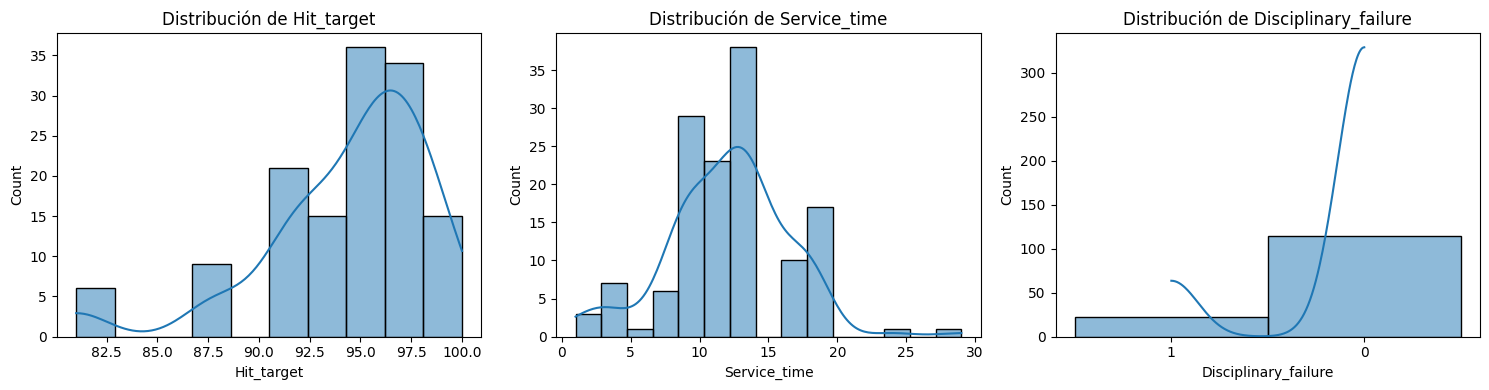

In [92]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(desempeño_profesional['Hit_target'], kde=True, ax=axs[0])
axs[0].set_title("Distribución de Hit_target")

sns.histplot(desempeño_profesional['Service_time'], kde=True, ax=axs[1])
axs[1].set_title("Distribución de Service_time")

sns.histplot(desempeño_profesional['Disciplinary_failure'], kde=True, ax=axs[2])
axs[2].set_title("Distribución de Disciplinary_failure")

#plt.suptitle("Distribuciones de Edad e Hijos en el Dataset de RRHH")

plt.tight_layout()
plt.show()


In [93]:
# Asegura que las columnas sean del tipo correcto
desempeño_profesional['Hit_target'] = pd.to_numeric(desempeño_profesional['Hit_target'], errors='coerce')
desempeño_profesional['Disciplinary_failure'] = pd.to_numeric(desempeño_profesional['Disciplinary_failure'], errors='coerce')

def clasificar_desempeño(row):
    if pd.isnull(row['Hit_target']) or pd.isnull(row['Disciplinary_failure']):
        return 'sin clasificar'
    if row['Hit_target'] > 90 and row['Disciplinary_failure'] == 0:
        return 'alto'    
    elif row['Hit_target'] > 90 and row['Disciplinary_failure'] == 1:
        return 'medio'
    elif row['Hit_target'] > 85 and row['Disciplinary_failure'] == 1:
        return 'medio'
    elif row['Hit_target'] > 85 and row['Disciplinary_failure'] == 0:
        return 'medio'
    elif row['Hit_target'] <= 85 and row['Disciplinary_failure'] == 1:
        return 'bajo'
    elif row['Hit_target'] <= 85 and row['Disciplinary_failure'] == 0:
        return 'bajo'
    else:
        return 'sin clasificar'

desempeño_profesional['Performance'] = desempeño_profesional.apply(clasificar_desempeño, axis=1)

# Opcional: revisa algunos valores para depurar
print(desempeño_profesional[['Hit_target', 'Disciplinary_failure', 'Performance']].head())

desempeño_profesional

   Hit_target  Disciplinary_failure Performance
0          98                     1       medio
1          96                     1       medio
2          95                     1       medio
3          95                     0        alto
4          81                     1        bajo


,ID,Hit_target,Disciplinary_failure,Service_time,Work_load_Average_day,Age,Son,Education,Social_drinker,Social_smoker,Distance_Residence_Work,Performance
0,1,98,1,14,244.387,37,1,3,0,0,11,medio
1,2,96,1,12,326.452,48,1,1,0,1,29,medio
2,3,95,1,18,253.957,38,0,1,1,0,51,medio
3,4,95,0,13,271.219,40,1,1,1,0,14,alto
4,5,81,1,13,294.217,43,1,1,1,0,20,bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,94,0,14,377.550,37,1,3,0,0,11,alto
132,133,96,0,14,313.532,34,2,1,1,0,12,alto
133,134,88,1,18,265.017,50,1,1,1,0,13,medio
134,135,97,0,9,264.249,28,1,1,0,0,26,alto


In [94]:
# Muestra la cantidad de empleados en cada categoría de Performance
conteo_performance = desempeño_profesional['Performance'].value_counts()
conteo_performance

Performance
alto     106
medio     24
bajo       6
Name: count, dtype: int64

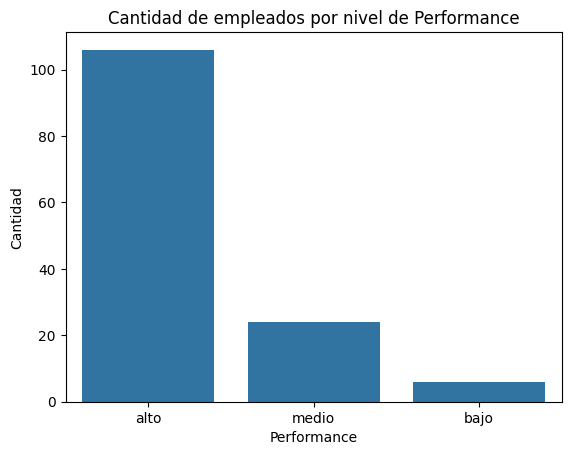

In [95]:
# Cuenta la cantidad de empleados por categoría de Performance
sns.countplot(data=desempeño_profesional, x='Performance', order=['alto', 'medio', 'bajo'])
plt.title('Cantidad de empleados por nivel de Performance')
plt.xlabel('Performance')
plt.ylabel('Cantidad')
plt.show()

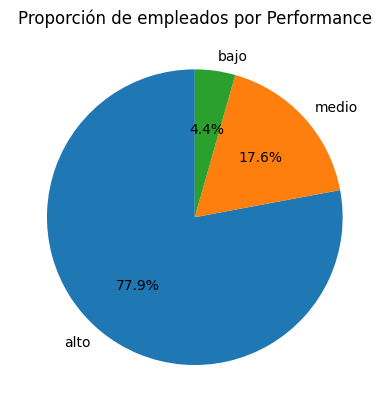

In [96]:
# Calcula las proporciones
proporciones = desempeño_profesional['Performance'].value_counts(normalize=True)

# Grafica las proporciones como un gráfico de pastel
proporciones.plot.pie(autopct='%1.1f%%', startangle=90, ylabel='', title='Proporción de empleados por Performance')
plt.show()

                         Hit_target  Disciplinary_failure  Service_time  \
Hit_target                 1.000000             -0.258539      0.010652   
Disciplinary_failure      -0.258539              1.000000     -0.000468   
Service_time               0.010652             -0.000468      1.000000   
Work_load_Average_day     -0.092714              0.042190      0.001945   
Age                       -0.006204              0.119954      0.626501   
Performance_num            0.688195             -0.719963      0.007687   
Son                        0.063556             -0.001972      0.018890   
Education                  0.046784             -0.052663     -0.232155   
Social_drinker            -0.155558              0.002387      0.273424   
Social_smoker              0.020112              0.204357      0.088519   
Distance_Residence_Work   -0.089261             -0.124424     -0.070718   

                         Work_load_Average_day       Age  Performance_num  \
Hit_target            

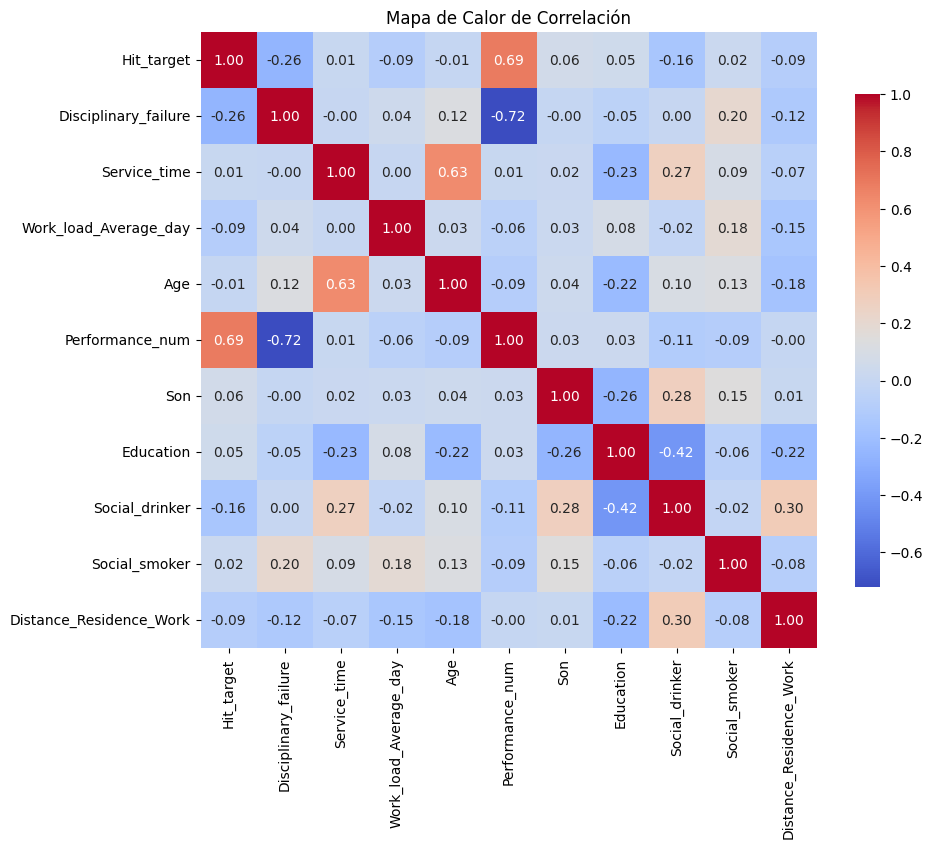

In [97]:
# Convierte los valores de la columna 'Performance' a números
mapa_performance = {'alto': 3, 'medio': 2, 'bajo': 1}
desempeño_profesional['Performance_num'] = desempeño_profesional['Performance'].map(mapa_performance)

# Muestra la correlación entre las variables
correlacion = desempeño_profesional[['Hit_target', 'Disciplinary_failure', 'Service_time', 'Work_load_Average_day', 'Age', 'Performance_num', 'Son', 'Education','Social_drinker', 'Social_smoker', 'Distance_Residence_Work']].corr()
print(correlacion)
# Muestra el mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de Correlación')
plt.show()



Ninguna de las variables numéricas analizadas muestra una correlación estadísticamente significativa con el nivel de desempeño (Performance).
Esto implica que:

Edad, antigüedad, carga de trabajo, hijos o distancia al trabajo no tienen un efecto claro (al menos lineal/monótono) sobre el desempeño medido como lo definiste.

Los valores de ρ (rho) están cerca de 0, indicando muy poca o ninguna relación.

                  Variable  Spearman_rho   p_value
2                      Age     -0.087336  0.311997
0             Service_time      0.047119  0.585943
1    Work_load_Average_day     -0.036201  0.675643
4                      Son      0.024326  0.778624
3  Distance_Residence_Work      0.013889  0.872500


C:\Users\maili\AppData\Local\Temp\ipykernel_7384\2971587056.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=corr_num, x='Spearman_rho', y='Variable', palette='viridis')


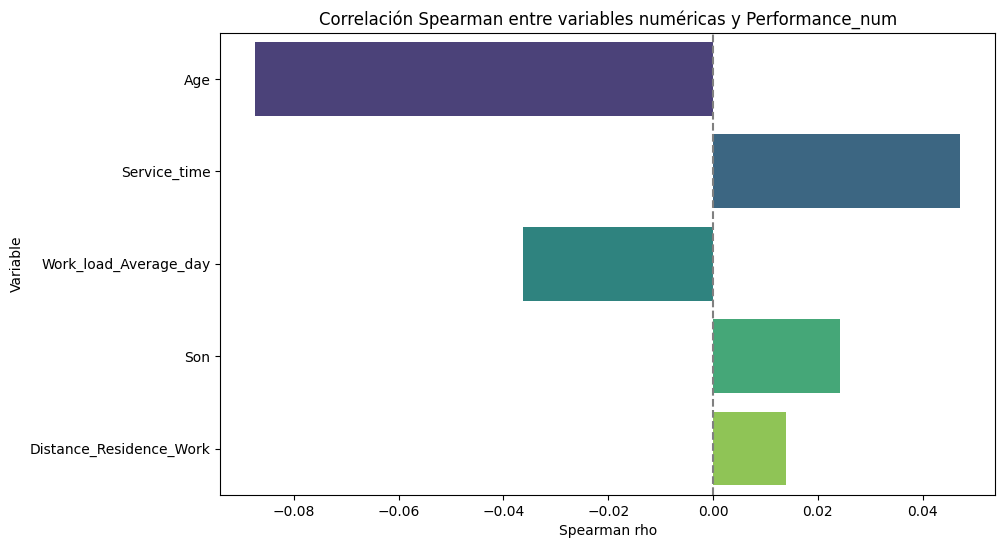

In [ ]:
from scipy import stats

# Identifica las variables numéricas
num_vars = ['Service_time', 'Work_load_Average_day', 'Age', 'Distance_Residence_Work', 'Son']

# Calcula la correlación Spearman entre las variables numéricas y la variable Performance_num
results_num = []
for var in num_vars:
    rho, p = stats.spearmanr(desempeño_profesional[var], desempeño_profesional['Performance_num'])
    results_num.append({'Variable': var, 'Spearman_rho': rho, 'p_value': p})
corr_num = pd.DataFrame(results_num).sort_values('p_value')

# Muestra el DataFrame de correlación
print(corr_num) 

# Muestra la correlación entre las variables numéricas y la variable Performance_num
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_num, x='Spearman_rho', y='Variable', palette='viridis')
plt.title('Correlación Spearman entre variables numéricas y Performance_num')
plt.xlabel('Spearman rho')
plt.ylabel('Variable')
plt.axvline(0, color='gray', linestyle='--')
plt.show()





Social_drinker - Chi2=4.49, p=0.1061
No hay relación significativa entre Social_drinker y Performance (p >= 0.05)

Social_smoker - Chi2=4.97, p=0.0835
No hay relación significativa entre Social_smoker y Performance (p >= 0.05)

Education - Chi2=1.81, p=0.7715
No hay relación significativa entre Education y Performance (p >= 0.05)

Education - Spearman rho=-0.005, p=0.9561


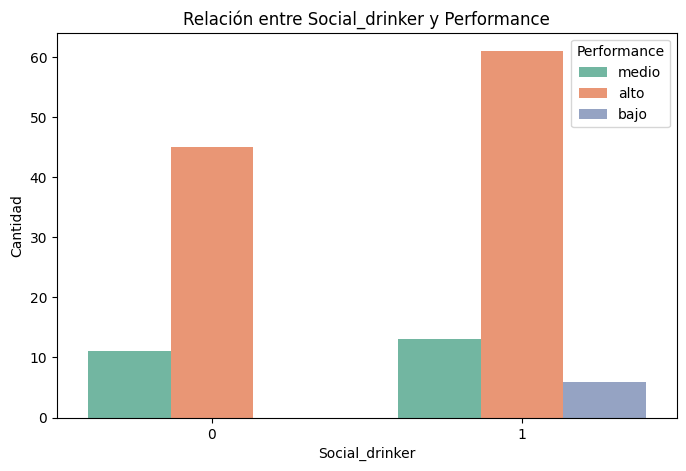

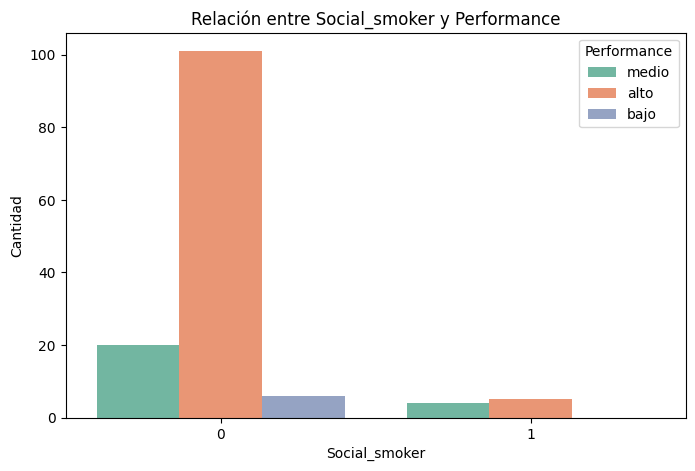

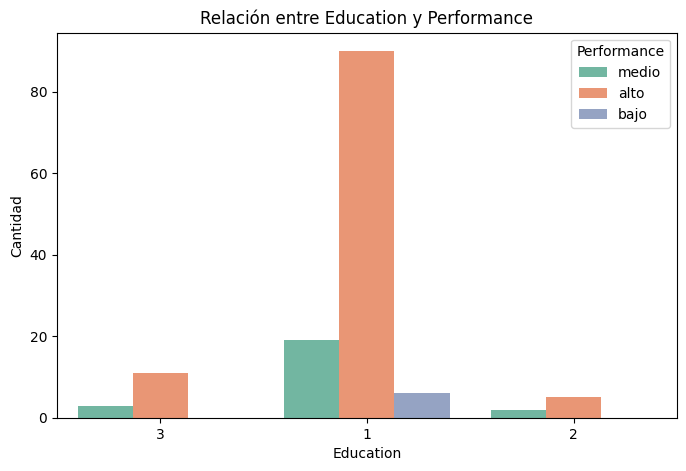

In [112]:
# Identifica las variables categóricas

categorical_vars = ['Social_drinker', 'Social_smoker', 'Education']  

# CHI-CUADRADO para binarias
for var in ['Social_drinker', 'Social_smoker']:
    tabla = pd.crosstab(desempeño_profesional[var], desempeño_profesional['Performance_num'])
    chi2, p, dof, exp = stats.chi2_contingency(tabla)
    print(f'\n{var} - Chi2={chi2:.2f}, p={p:.4f}')
    if p < 0.05:
        print(f'Existe una relación significativa entre {var} y Performance (p < 0.05)')
    else:
        print(f'No hay relación significativa entre {var} y Performance (p >= 0.05)')

p 

# CHI-CUADRADO para categóricas
for var in ['Education']:
    tabla = pd.crosstab(desempeño_profesional[var], desempeño_profesional['Performance_num'])
    chi2, p, dof, exp = stats.chi2_contingency(tabla)
    print(f'\n{var} - Chi2={chi2:.2f}, p={p:.4f}')
    if p < 0.05:
        print(f'Existe una relación significativa entre {var} y Performance (p < 0.05)')
    else:
        print(f'No hay relación significativa entre {var} y Performance (p >= 0.05)')


rho, p = stats.spearmanr(desempeño_profesional[var], desempeño_profesional['Performance_num'])
print(f'\nEducation - Spearman rho={rho:.3f}, p={p:.4f}')


        
# Muestra la relación entre las variables categóricas y Performance
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=desempeño_profesional, x=var, hue='Performance', palette='Set2')
    plt.title(f'Relación entre {var} y Performance')
    plt.xlabel(var)
    plt.ylabel('Cantidad')
    plt.legend(title='Performance')
    plt.show()

| Elemento del gráfico                  | Significado                                       |
| ------------------------------------- | ------------------------------------------------- |
| Línea dentro de la caja               | **Mediana** de la distancia                       |
| Caja (delimitada por Q1 y Q3)         | 50 % central de los datos (rango intercuartílico) |
| Líneas que salen de la caja (bigotes) | Rango típico sin valores atípicos                 |
| Puntos individuales (si los hubiera)  | Posibles **outliers**                             |

💡 Observaciones específicas:
Grupo de desempeño "bajo":
Tiene la mediana más alta (alrededor de 31 km).
En general, las personas con desempeño bajo tienden a vivir más lejos del trabajo.

Grupo "alto":
La mediana es más baja (alrededor de 26 km).
Caja más estrecha ⇒ menos dispersión.

Grupo "medio":
Mediana parecida al "alto", tal vez incluso un poco menor.
Distribución similar, pero más dispersa que "alto".

Conclusión visual
Aunque el test de Spearman no encontró una correlación significativa, el gráfico sugiere una tendencia:
A mayor distancia al trabajo, tiende a haber peor desempeño (aunque no es una regla absoluta).
Este tipo de patrón no lineal o no perfectamente monótono puede escaparse a los tests clásicos, pero es valioso desde una perspectiva práctica.

¿Qué hacer con esta información?
📌 Para selección:
Priorizar candidatos que vivan cerca del centro logístico.
Ofrecer incentivos o apoyo logístico a quienes vivan lejos (bonos de transporte, horarios más flexibles).

📌 Para retención:
Analizar si empleados que viven lejos tienen más ausencias o rotación.
Implementar programas de relocalización voluntaria (si es viable).

📌 Para capacitación:
Considerar que quienes viven lejos podrían tener más fatiga acumulada, y diseñar estrategias que consideren esto (sesiones virtuales, horarios adaptados).

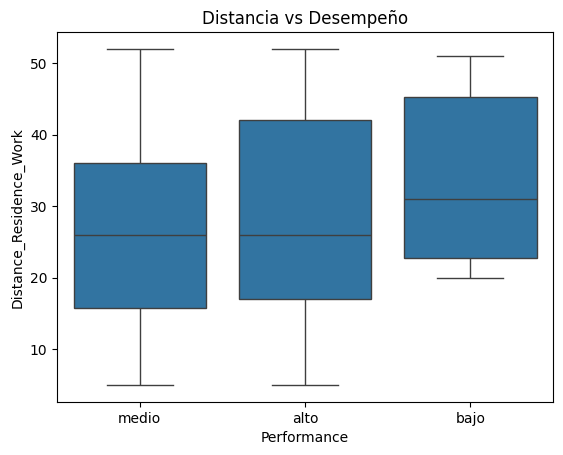

In [ ]:
# Muestra la relación entre la distancia de residencia y el desempeño
sns.boxplot(x='Performance', y='Distance_Residence_Work', data=desempeño_profesional)
plt.title('Distancia vs Desempeño')
plt.show()


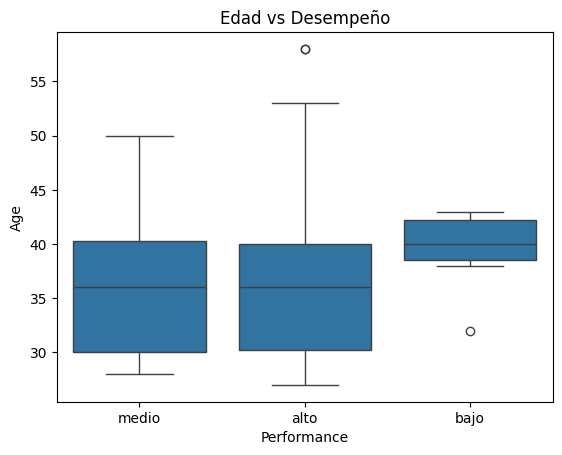

In [113]:
# Muestra la relación entre la distancia de residencia y el desempeño
sns.boxplot(x='Performance', y='Age', data=desempeño_profesional)
plt.title('Edad vs Desempeño')
plt.show()

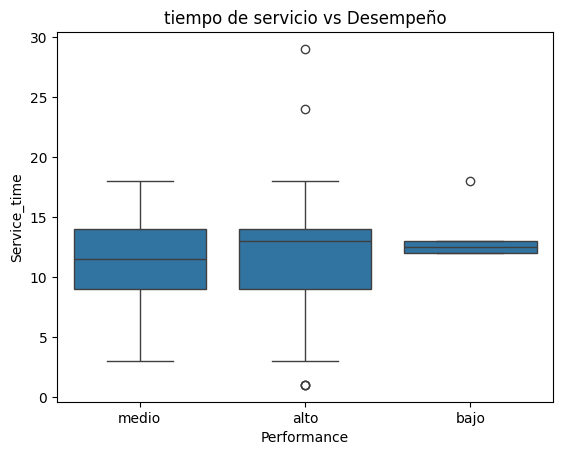

In [114]:
# Muestra la relación entre la distancia de residencia y el desempeño
sns.boxplot(x='Performance', y='Service_time', data=desempeño_profesional)
plt.title('tiempo de servicio vs Desempeño')
plt.show()

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Selecciona la variable dependiente y las independientes
y = desempeño_profesional['Performance_num']
X = desempeño_profesional.drop(['Performance', 'Performance_num'], axis=1)

# Convierte variables categóricas a dummies si es necesario
X = pd.get_dummies(X, drop_first=True)

# Divide en conjunto de entrenamiento y prueba (opcional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y ajusta el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Puedes ver los coeficientes así:
for col, coef in zip(X.columns, modelo.coef_):
    print(f"{col}: {coef:.3f}")

# Predicción de ejemplo
y_pred = modelo.predict(X_test)

ID: 0.001
Hit_target: 0.043
Disciplinary_failure: -0.697
Service_time: -0.001
Age: 0.003
Son: -0.027
Distance_Residence_Work: -0.002
Work_load_Average_day_236.629: 0.462
Work_load_Average_day_237.656: 0.031
Work_load_Average_day_239.409: 0.118
Work_load_Average_day_239.554: 0.120
Work_load_Average_day_241.476: 0.277
Work_load_Average_day_244.387: -0.152
Work_load_Average_day_246.074: -0.029
Work_load_Average_day_246.288: 0.378
Work_load_Average_day_249.797: 0.176
Work_load_Average_day_251.818: 0.186
Work_load_Average_day_253.465: 0.316
Work_load_Average_day_253.957: 0.064
Work_load_Average_day_261.306: 0.227
Work_load_Average_day_261.756: -0.408
Work_load_Average_day_264.249: 0.137
Work_load_Average_day_264.604: 0.301
Work_load_Average_day_265.017: -0.102
Work_load_Average_day_265.615: 0.252
Work_load_Average_day_268.519: 0.380
Work_load_Average_day_271.219: 0.231
Work_load_Average_day_275.089: 0.049
Work_load_Average_day_275.312: 0.071
Work_load_Average_day_280.549: 0.146
Work_load_Av

### REGRESION LINEAL DEL MODELO

In [101]:
# 1. Cargar y limpiar datos
df = df_RRHH_16062025.copy()
df = df.dropna()

# 2. Convertir variables categóricas a dummies
df = pd.get_dummies(df, columns=['Reason_absence', 'Month_absence', 'Day_week', 'Seasons'], drop_first=True)

# 3. Separar variables
X = df.drop(columns=['ID', 'Absenteeism_hours'])
y = df['Absenteeism_hours']

# 4. Convertir booleanos a enteros
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# 6. Convertir todo a numérico
X = X.apply(pd.to_numeric, errors='raise')
y = pd.to_numeric(y, errors='raise')

# 7. Eliminar valores faltantes
X = X.dropna()
y = y.loc[X.index]

# 8. Ajustar modelo
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()

# 9. Resultados
print(modelo.summary())

NameError: name 'sm' is not defined

### VARIABLES MAS SIGNIFICATIVAS

In [ ]:
# Obtener resumen del modelo como DataFrame
summary_df = modelo.summary2().tables[1]

# Filtrar variables con p-valor < 0.05
significant_vars = summary_df[summary_df['P>|t|'] < 0.05]

# Ordenar por importancia del coeficiente (absoluto)
significant_vars = significant_vars.reindex(significant_vars['Coef.'].abs().sort_values(ascending=False).index)

# Mostrar solo columnas relevantes
print("Variables significativamente asociadas al absentismo:\n")
print(significant_vars[['Coef.', 'P>|t|']])

### GRAFICO VARIABLES MAS SIGNIFICATIVAS

In [ ]:
# Extraer variables significativas como antes
summary_df = modelo.summary2().tables[1]
significant_vars = summary_df[summary_df['P>|t|'] < 0.05]
significant_vars = significant_vars.reindex(significant_vars['Coef.'].abs().sort_values(ascending=False).index)

# Crear gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    y=significant_vars.index,
    x=significant_vars['Coef.'],
    palette='coolwarm',
    orient='h'
)

plt.axvline(0, color='gray', linestyle='--')
plt.title('Variables significativas asociadas al absentismo laboral')
plt.xlabel('Impacto estimado en horas de absentismo')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()